In [46]:
require(data.table)
require(ltm)

In [3]:
# Lendo arquivo no data.table
path_ = "datasets/StudentPerformance/Student_Performance.csv"

studentPeformance = fread(path_)

In [4]:
head(x = studentPeformance, n = 5)

Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
<int>,<int>,<chr>,<int>,<int>,<dbl>
7,99,Yes,9,1,91
4,82,No,4,2,65
8,51,Yes,7,2,45
5,52,Yes,5,2,36
7,75,No,8,5,66


Verificando valores nulos no `data.table`

In [ ]:
# Contando valores nulos em cada coluna
count.na = studentPeformance[,
    lapply(X = .SD,
    FUN = function(x){
        return(sum(is.null((x))))
    })
]

# Criando o dataframe para melhor visualização
data.frame(
    colunas = names(count.na),
    `quantidade de valores nulos` = transpose(count.na)[,V1]
)

colunas,quantidade.de.valores.nulos
<chr>,<int>
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [19]:
horas.extracurricular = studentPeformance[, .N, by="Extracurricular Activities"]
horas.extracurricular

Extracurricular Activities,N
<chr>,<int>
Yes,4948
No,5052


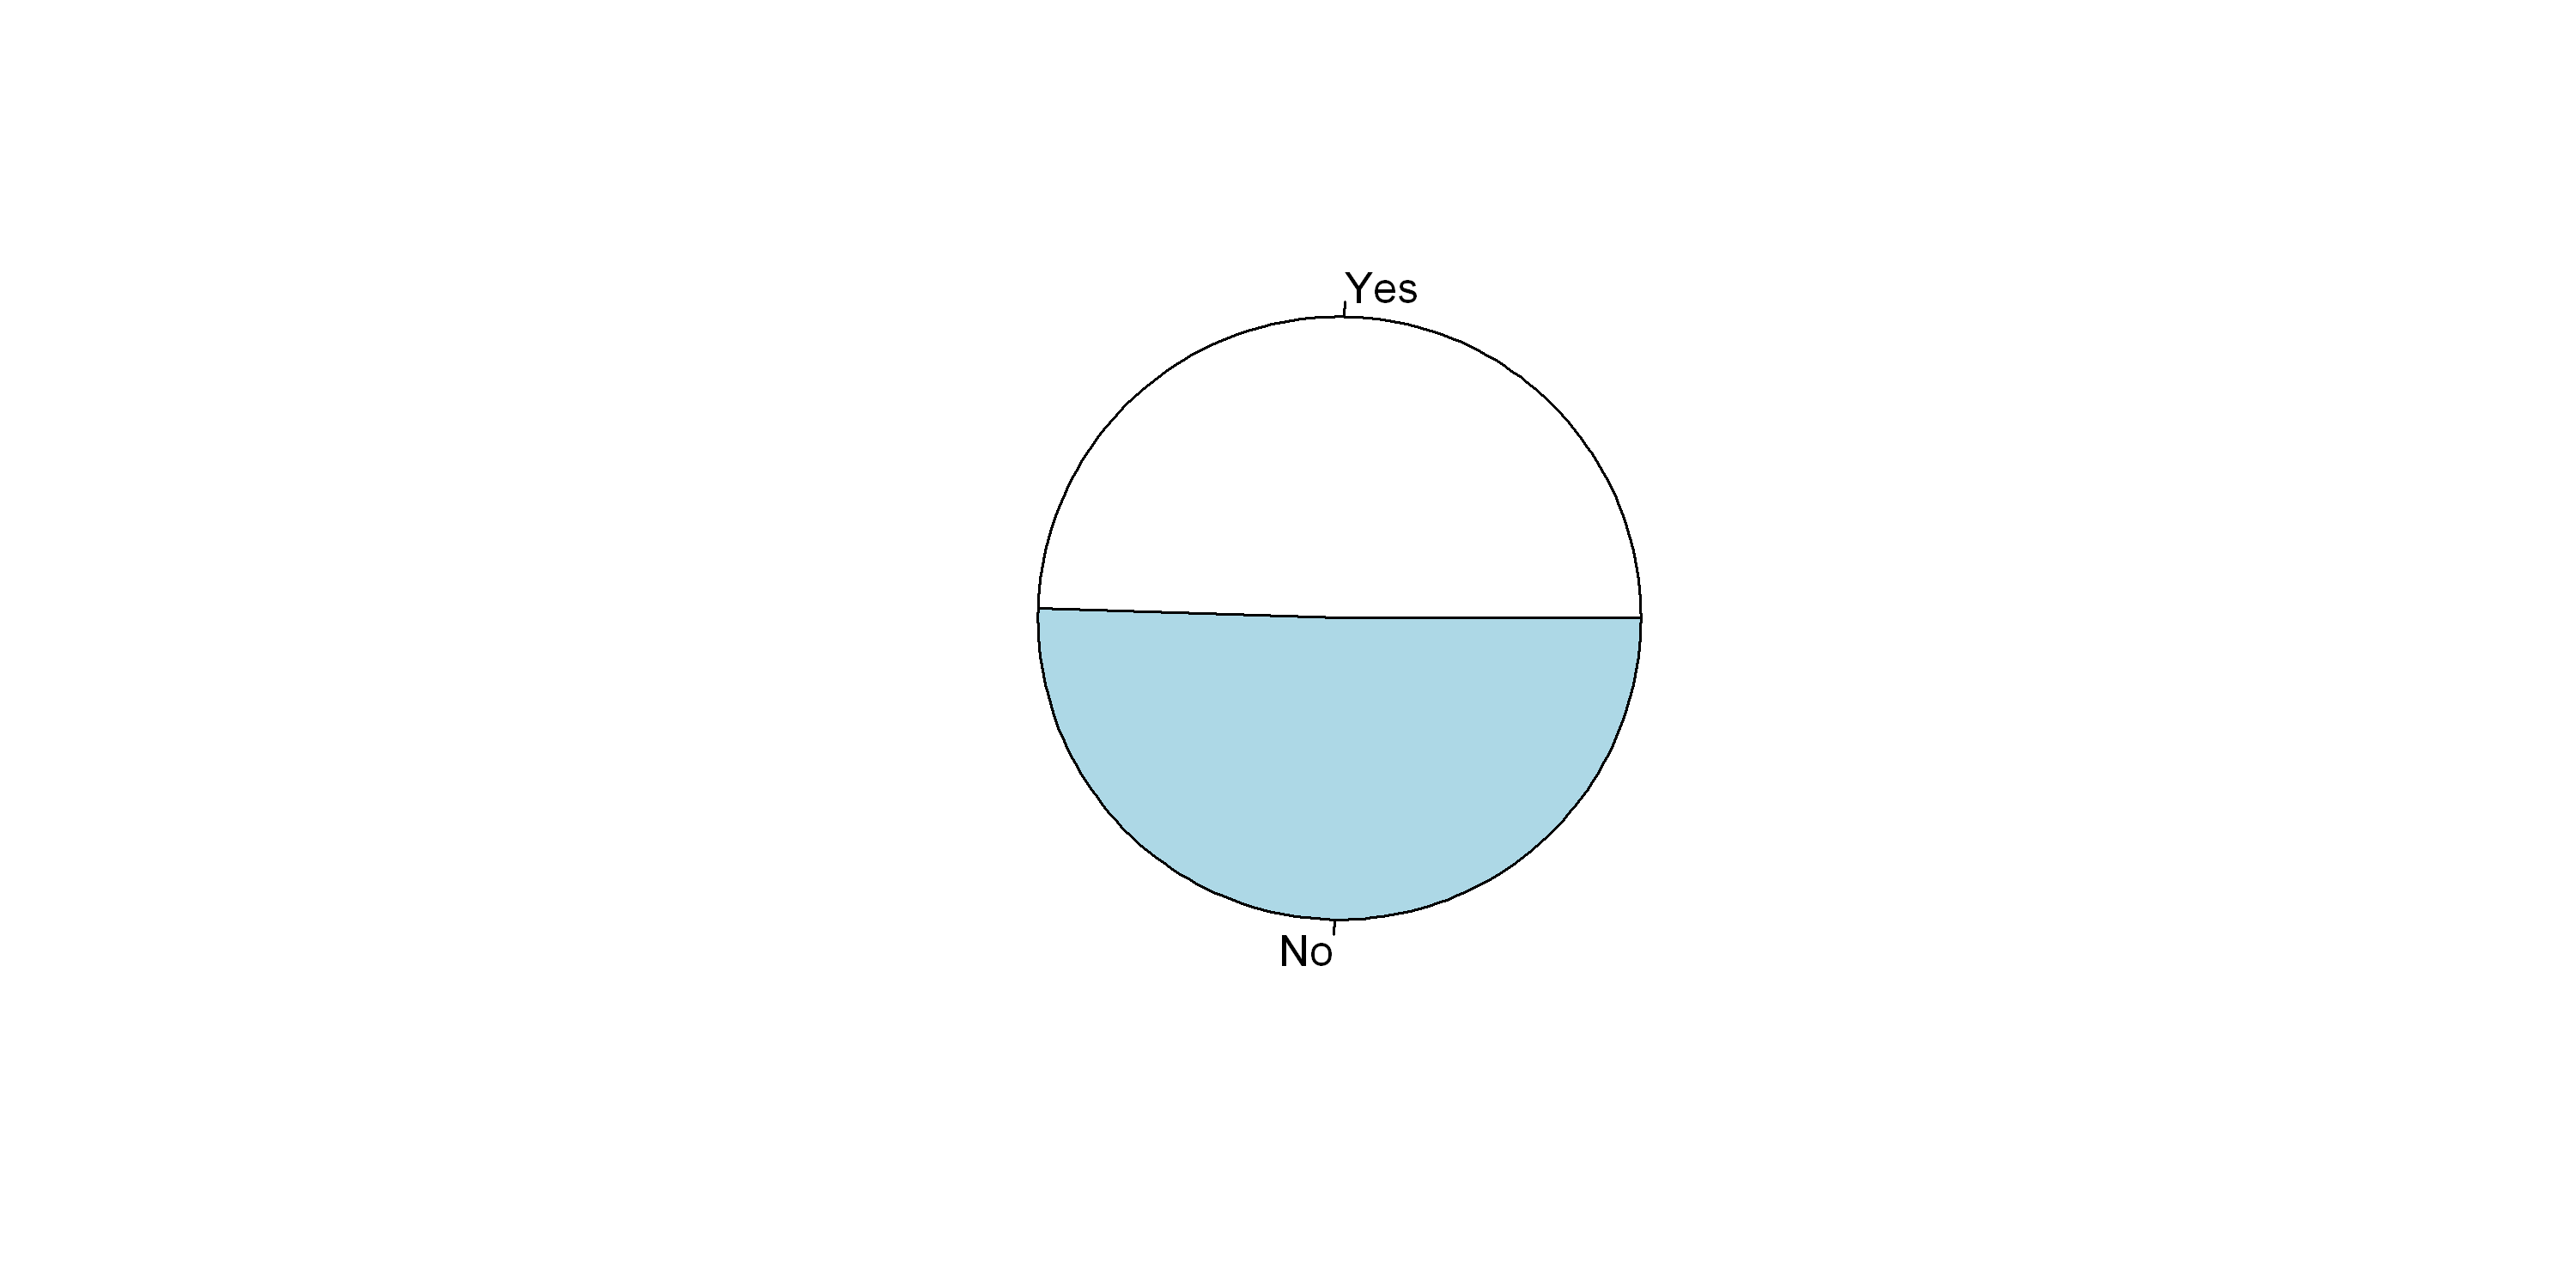

In [33]:
par(bg = "white")
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)


pie( x      = horas.extracurricular[, N], 
     labels = c("Yes", "No"))

Correlação entre a variavel numerica e binaria. Performance Index e Atv. Extracurricular possui alta correlação|associação?

In [36]:
studentPeformance[, 
    horas.extracurricular.bin := as.numeric(
        factor(studentPeformance$`Extracurricular Activities`)
        )
    ]
head(studentPeformance,n = 3)

Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,horas.extracurricular.bin
<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
7,99,Yes,9,1,91,2
4,82,No,4,2,65,1
8,51,Yes,7,2,45,2


In [ ]:
# Usando a correlação de peason
cor(
    studentPeformance$`Performance Index`, studentPeformance$horas.extracurricular.bin,
    method = c("pearson")
)

[1] 0.02452495

> Possuem uma baixa correlação, mas verei outro metodo

In [47]:
# PointBisserl
biserial.cor(
    x = studentPeformance$`Performance Index`,
    y = studentPeformance$horas.extracurricular.bin
)

[1] -0.02452495

> Poderia remover essa varivel do modelo, contudo, vou utilizar todos e verificar por meio de teste de hipotese os coeficiente com significancia

In [51]:
# Verificando performane média de alunos em relação a horas de estudo

perfomance.hora = studentPeformance[, 
    mean(`Performance Index`), by = "Hours Studied"
    ]

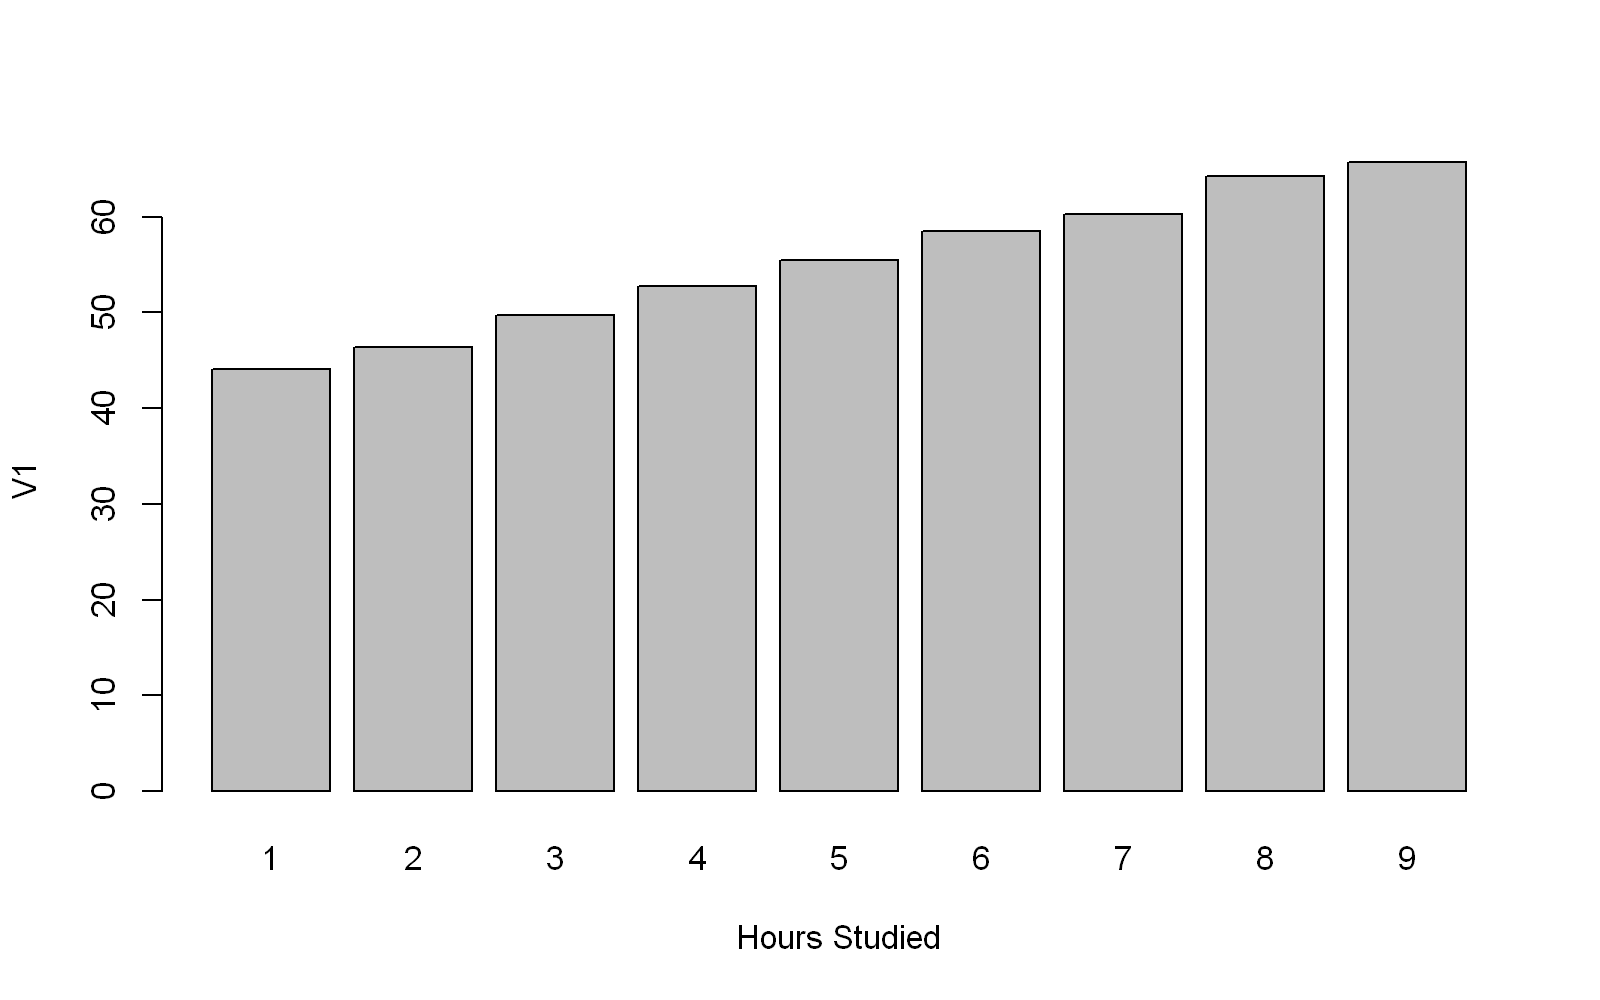

In [58]:
par(bg = "white")
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 200)

barplot(V1~., data = perfomance.hora)

Modelo Regressão Multipla R

In [59]:
model = NULL